Exploratory Data Analysis (EDA) Using Python Libraries

For the simplicity of the article, we will use a single dataset. We will use the employee data for this. It contains 8 columns namely – First Name, Gender, Start Date, Last Login, Salary, Bonus%, Senior Management, and Team. We can get the dataset here https://media.geeksforgeeks.org/wp-content/uploads/employees.csv

Let’s read the dataset using the Pandas read_csv() function and print the 1st five rows. To print the first five rows we will use the head() function.


In [24]:
import pandas as pd
import numpy as np
# read datasdet using pandas
data = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/employees.csv')
df=data
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [ ]:
df.shape


(1000, 8)

This means that this dataset has 1000 rows and 8 columns.

Let’s get a quick summary of the dataset using the pandas describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [ ]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


Note we can also get the description of categorical columns of the dataset if we specify include =’all’  in the describe function.

Now, let’s also see the columns and their data types. For this, we will use the info() method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB



Changing Dtype from Object to Datetime

Start Date is an important column for employees. However, it is not of much use if we can not handle it properly. To handle this type of data pandas provide a special function datetime() from which we can change object type to DateTime format.

In [25]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'])


We can see the number of unique elements in our dataset. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.

In [3]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

Till now we have got an idea about the dataset used. Now Let’s see if our dataset contains any missing values or not.
Handling Missing Values

You all must be wondering why a dataset will contain any missing values. It can occur when no information is provided for one or more items or for a whole unit. For Example, Suppose different users being surveyed may choose not to share their income, and some users may choose not to share their address in this way many datasets went missing. Missing Data is a very big problem in real-life scenarios. Missing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

    isnull()
    notnull()
    dropna()
    fillna()
    replace()
    interpolate()

Now let’s check if there are any missing values in our dataset or not.

Example:

In [26]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

We can see that every column has a different amount of missing values. Like Gender has 145 missing values and salary has 0. Now for handling these missing values there can be several cases like dropping the rows containing NaN or replacing NaN with either mean, median, mode, or some other value.

Now, let’s try to fill in the missing values of gender with the string “No Gender”.

Example:

In [27]:
df["Gender"].fillna("No Gender", inplace = True)

df.isnull().sum()


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

We can see that now there is no null value for the gender column. Now, Let’s fill the senior management with the mode value.

Example:

In [28]:
mode = df['Senior Management'].mode().values[0]
df['Senior Management']= df['Senior Management'].replace(np.nan, mode)

df.isnull().sum()


First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

Now for the first name and team, we cannot fill the missing values with arbitrary data, so, let’s drop all the rows containing these missing values.

Example:

In [29]:
df = df.dropna(axis = 0, how ='any')

print(df.isnull().sum())
df.shape


First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

We can see that our dataset is now free of all the missing values and after dropping the data the number of rows also reduced from 1000 to 899.

Data Encoding

There are some models like Linear Regression which does not work with categorical dataset in that case we should try to encode categorical dataset into the numerical column. we can use different methods for encoding like Label encoding or One-hot encoding. pandas and sklearn provide different functions for encoding in our case we will use the LabelEncoding function from sklearn to encode the Gender column.

In [30]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the "Senior Management"
# column with LabelEncoder
df['Gender'] = le.fit_transform(df['Gender'])


<ipython-input-30-546dc556bcbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])



Data visualization

Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

Let’s see some commonly used graphs –

Note: We will use Matplotlib and Seaborn library for the data visualization.

Histogram


It can be used for both uni and bivariate analysis.

Example:

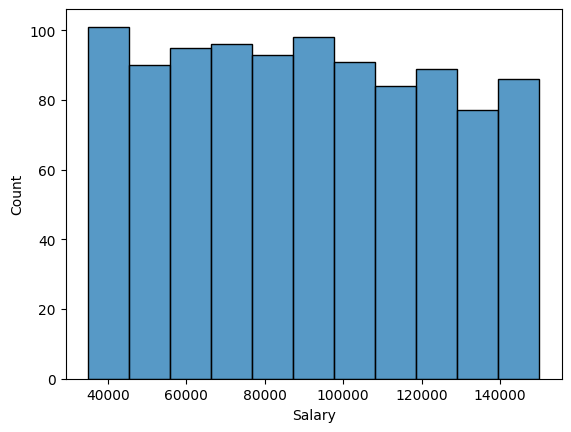

In [31]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='Salary', data=data)
plt.show()


Boxplot

It can also be used for univariate and bivariate analyses.

Example:

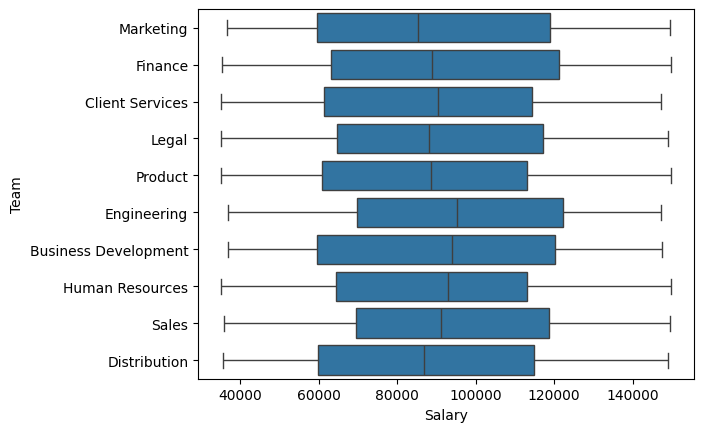

In [32]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( x="Salary", y='Team', data=data)
plt.show()


Scatter Boxplot For Data Visualization

It can be used for bivariate analyses.

Example:

In [33]:
data

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,No Gender,2014-11-23,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product
998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development


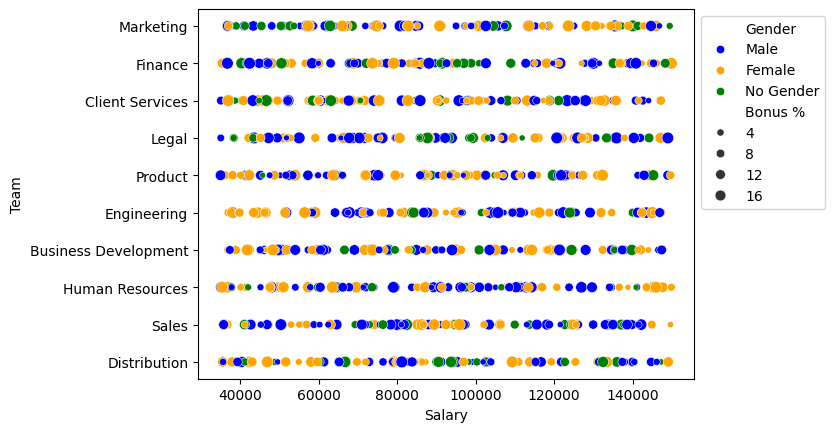

In [35]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

palette=['blue','orange','green']
sns.scatterplot( x="Salary", y='Team', data=data,palette=palette,
				hue='Gender', size='Bonus %')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


For multivariate analysis, we can use pairplot()method of the seaborn module. We can also use it for the multiple pairwise bivariate distributions in a dataset.

Example:

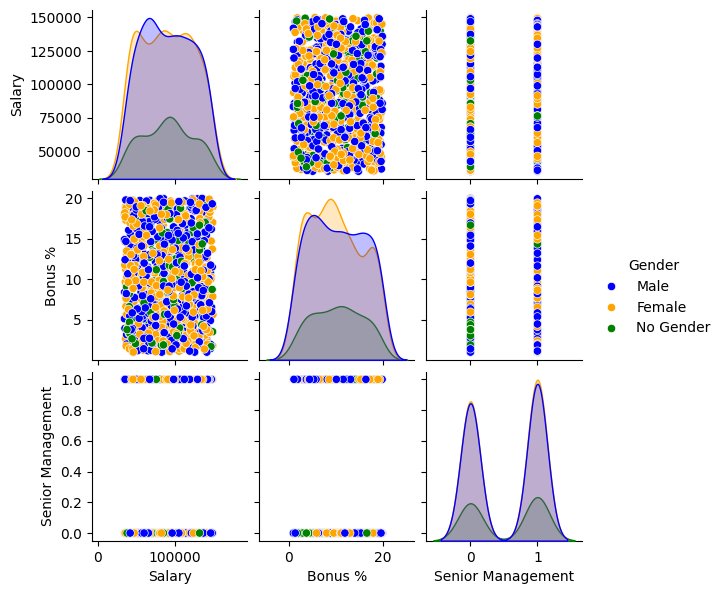

In [37]:
palette=['blue','orange','green']
sns.pairplot(data, hue='Gender',palette=palette, height=2)
